# Data Pre Processing

In [ ]:
#importing packages
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
#importing data set
data = pd.read_csv('/content/drive/MyDrive/Data sets/genres_v2.csv')
data.head()

<ipython-input-97-d9280c088690>:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Data sets/genres_v2.csv')


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [ ]:
#cleaning the data sets
data.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [ ]:
#droping the unwanted columns
data = data.drop(['title','Unnamed: 0','id','uri','track_href','analysis_url','type','song_name'],axis=1)

In [ ]:
data.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'genre'],
      dtype='object')

In [ ]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4,Dark Trap


In [ ]:
data.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
genre               0
dtype: int64

data has no null value now


# Data Analysis

In [ ]:
#EDA
data.shape

(42305, 14)

In [ ]:
#identifying all the numeric columns
numeric = data._get_numeric_data()
genre = data['genre']
print(numeric.head())
print("Numeric column: ",end =" ")
print(numeric.columns)
print(len(numeric.columns))

numeric.describe()

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  
0          0.013400    0.0556   0.3890  156.985       124539               4  
1          0.000000    0.1180   0.1240  115.080       224427               4  
2          0.000004    0.3720   0.0391  218.050        98821               4  
3          0.000000    0.1140   0.1750  186.948       123661               3  
4          0.000000    0.1660   0.5910  147.988       123298               4  
Numeric column:  Index(['danceability', 'energy', 'key', 'loudness', 'mode'

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000


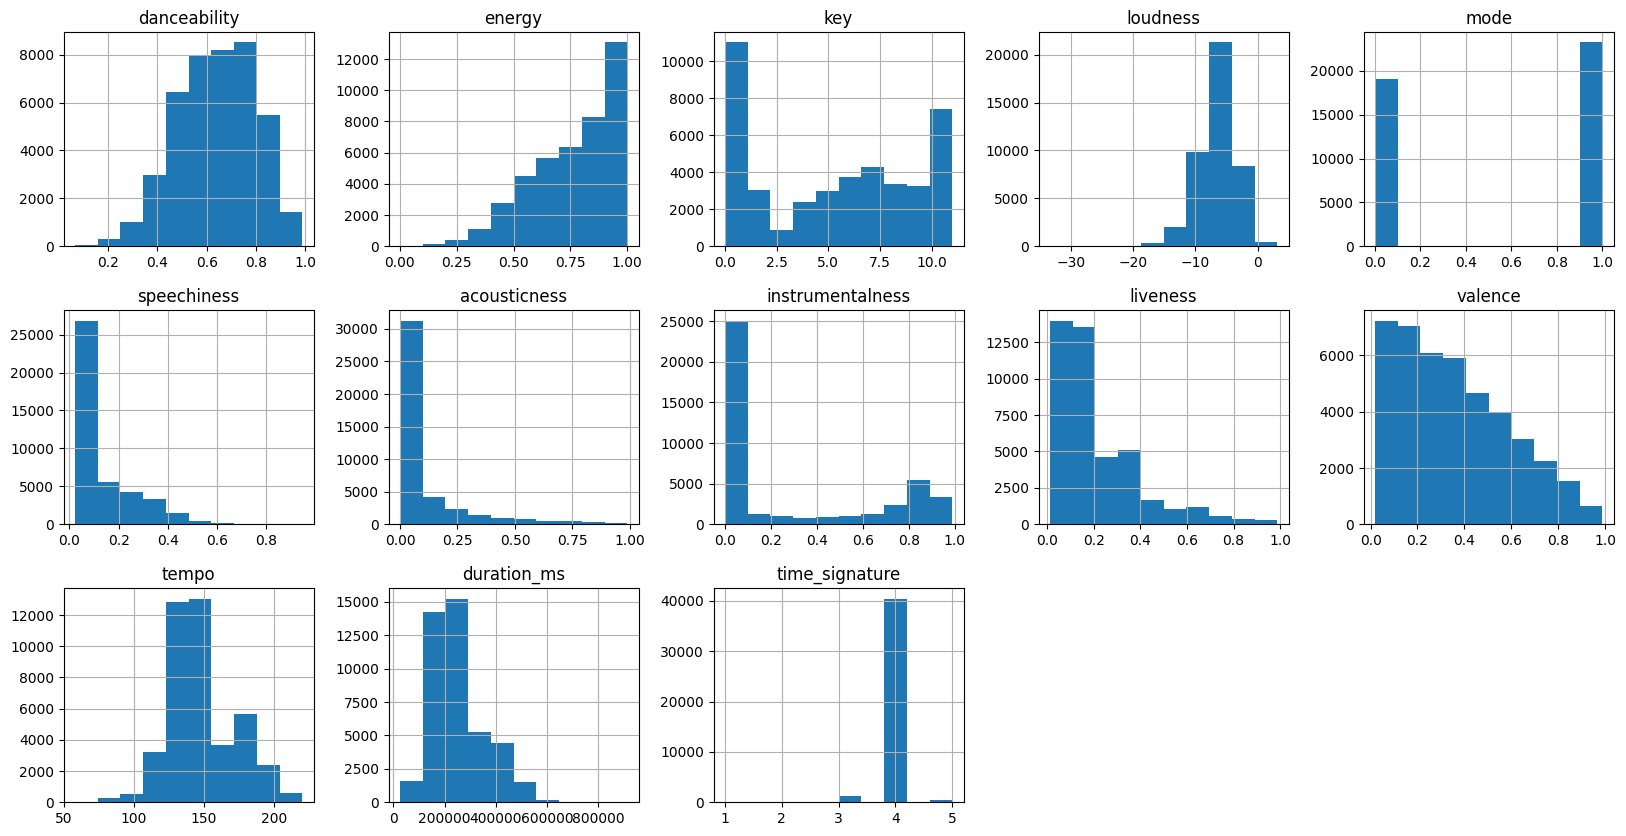

In [ ]:
#creating histogram for better analysis
num_hist = numeric.hist(layout=(3,5),figsize = (20,10))
plt.show()

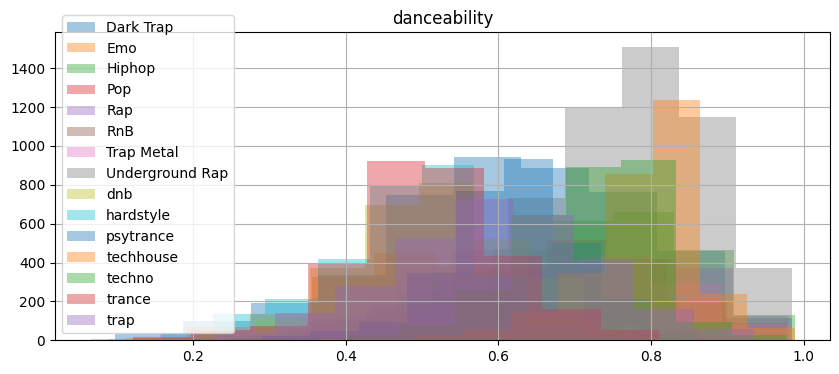

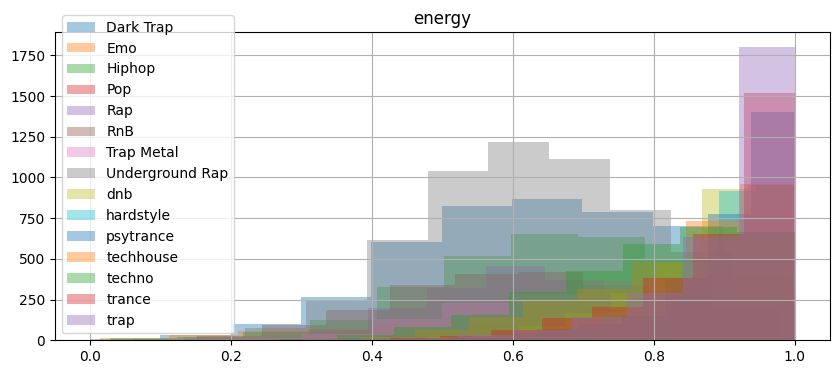

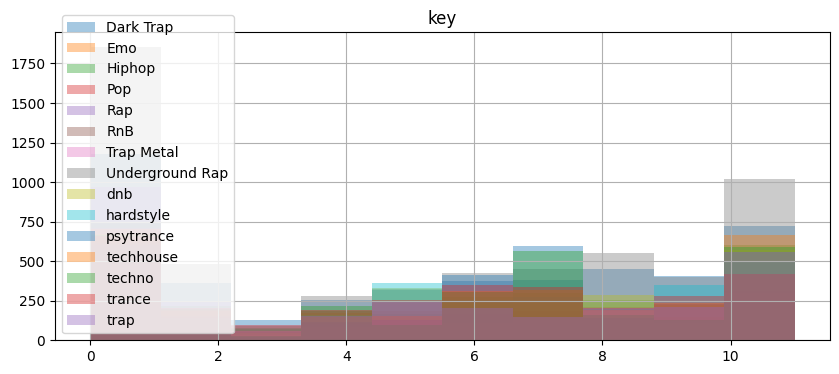

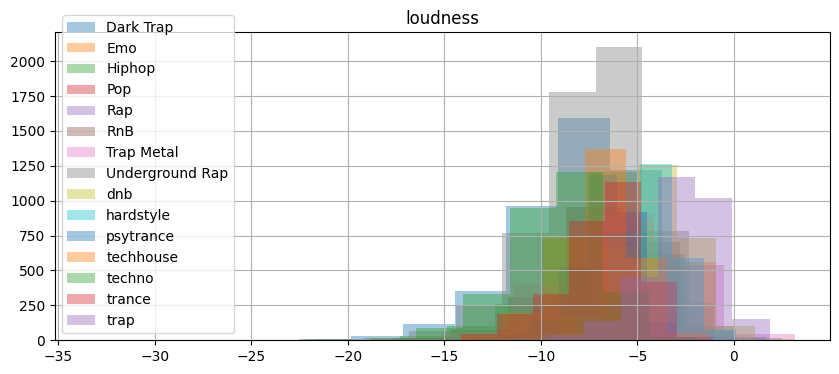

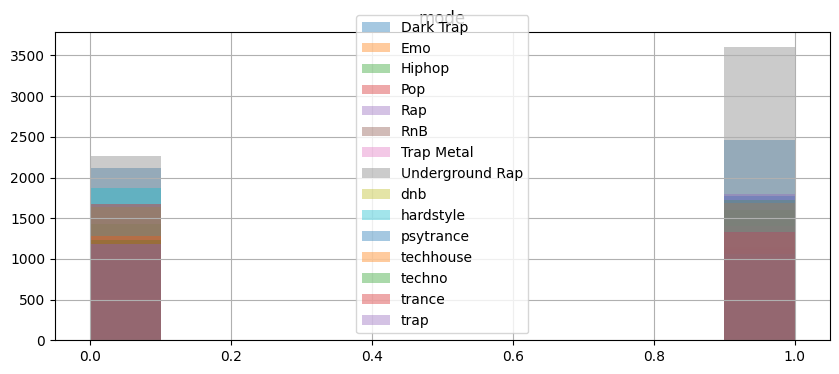

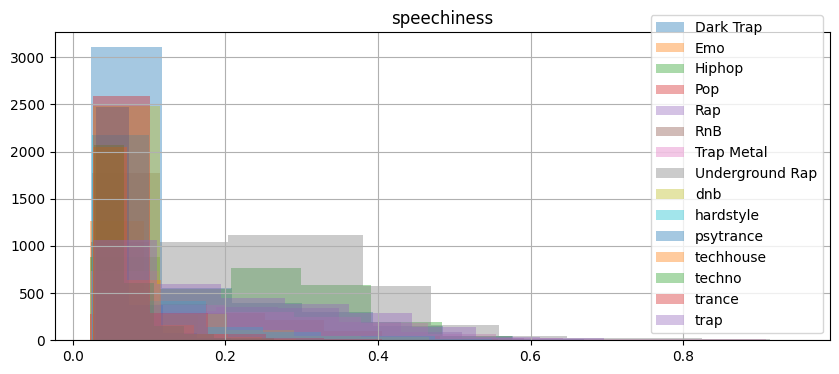

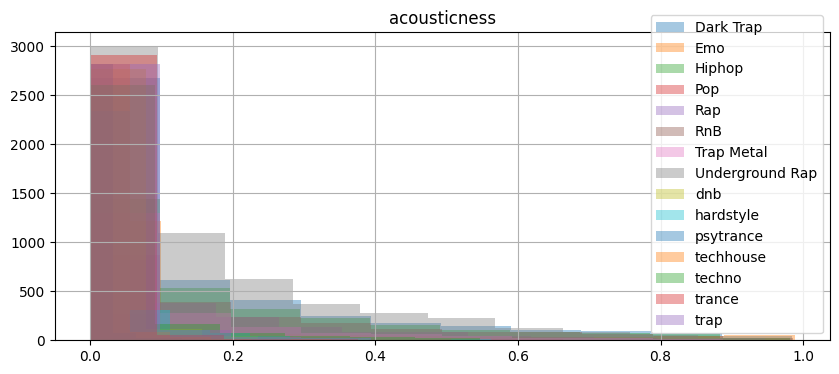

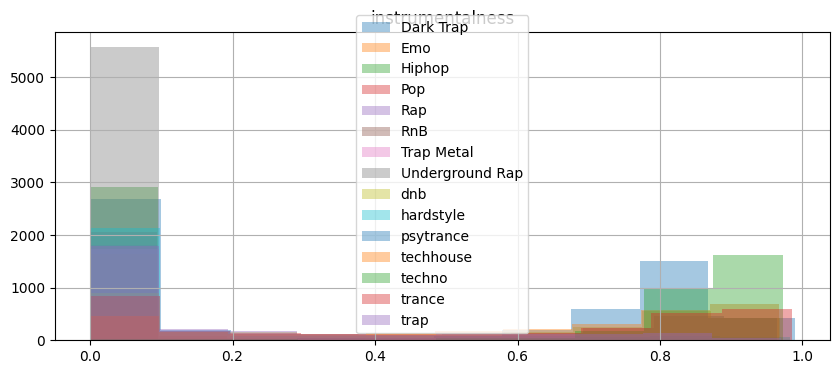

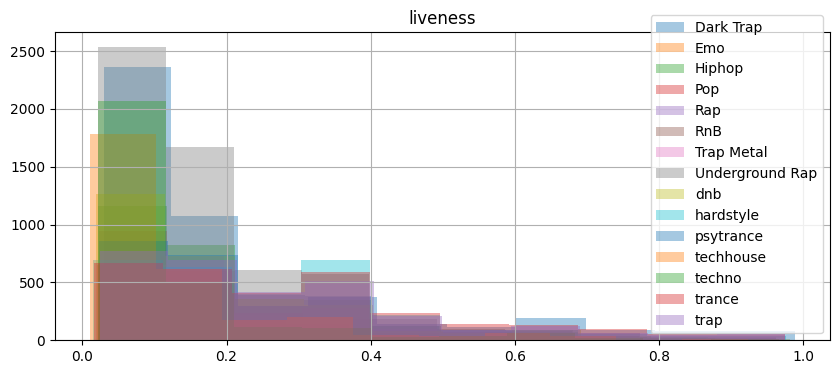

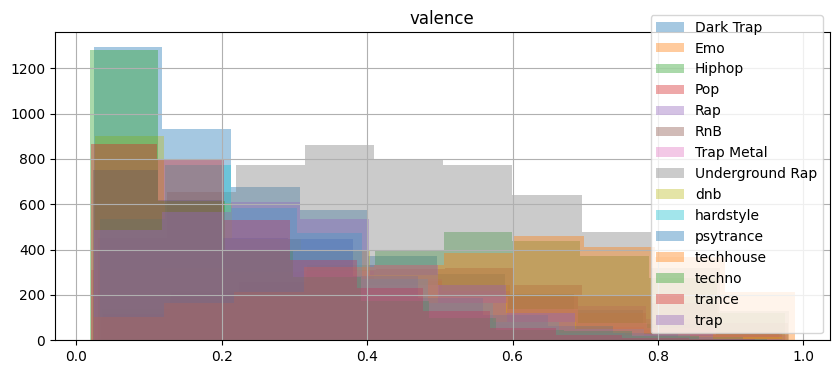

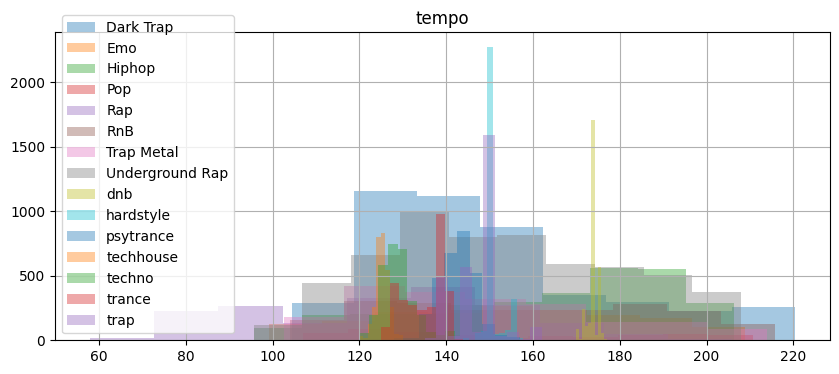

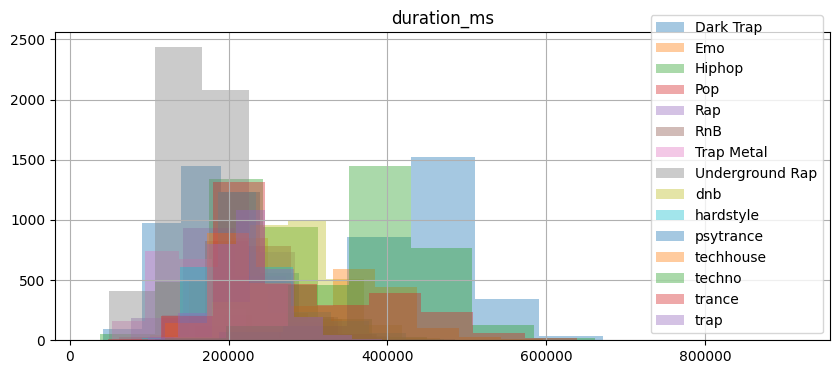

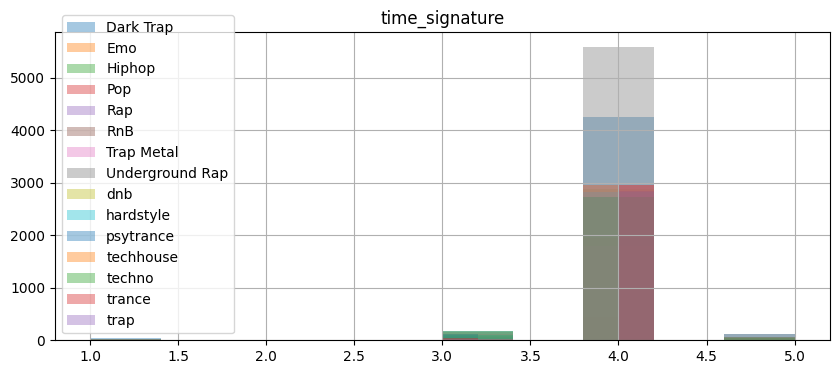

In [ ]:
#features of each genre
grouped_genre = data.groupby('genre')

for col in numeric.columns:
  fig,ax = plt.subplots()

  for i,d in grouped_genre:
    d[col].hist(alpha=0.4, ax=ax, label=i, figsize=(10,4))
    ax.set_title(col)

  ax.legend()
  plt.show()

In [ ]:
#Mean of different features in a Genre
grouped_genre.mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
genre,,,,,,,,,,,,,
Dark Trap,0.618834,0.646851,5.298384,-7.998401,0.536479,0.123434,0.159493,0.277276,0.185081,0.273663,149.791186,187707.330275,3.961337
Emo,0.493699,0.761175,5.052976,-5.433641,0.685714,0.080325,0.143094,0.011402,0.195243,0.444145,153.888640,218317.432143,3.938690
Hiphop,0.698982,0.654418,5.553170,-7.014983,0.527741,0.217150,0.195569,0.017154,0.210581,0.523628,162.980479,227954.272787,3.975561
Pop,0.676807,0.697638,5.399132,-5.632072,0.548807,0.088363,0.149251,0.013831,0.177949,0.550264,152.098937,211392.828633,3.984816
Rap,0.742877,0.620083,5.048701,-6.887086,0.522186,0.217862,0.170566,0.006939,0.181320,0.440921,126.006374,203007.674784,3.985931
RnB,0.674206,0.598884,5.021915,-6.899896,0.532158,0.143110,0.225276,0.007400,0.178984,0.493974,157.533793,226402.473559,3.960934
Trap Metal,0.647564,0.749157,4.663088,-5.879087,0.717791,0.209677,0.114926,0.057051,0.243655,0.348786,148.684947,147195.234151,3.953476
Underground Rap,0.744658,0.635776,5.059064,-7.362036,0.613617,0.224992,0.162708,0.025280,0.191116,0.444629,152.914521,176152.595234,3.979915
dnb,0.520944,0.873433,5.619016,-4.063237,0.446055,0.083478,0.019543,0.459998,0.202883,0.253062,173.849166,286548.825017,3.998314


In [ ]:
#Standard deviation of different features in a Genre
grouped_genre.std()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
genre,,,,,,,,,,,,,
Dark Trap,0.161002,0.180810,3.638048,3.156933,0.498722,0.123217,0.214746,0.366365,0.144774,0.206191,27.201544,60377.140798,0.368688
Emo,0.126014,0.220404,3.477168,2.598227,0.464369,0.075109,0.260326,0.077927,0.145681,0.202451,27.545931,43426.023963,0.318840
Hiphop,0.142183,0.162416,3.679533,2.827193,0.499312,0.131501,0.219940,0.093075,0.162457,0.222957,28.188804,60884.353006,0.329274
Pop,0.119175,0.155379,3.644698,1.947846,0.498153,0.081074,0.198390,0.085986,0.140379,0.215627,32.360009,35368.133282,0.250624
Rap,0.127670,0.137444,3.705862,2.353116,0.499643,0.134830,0.178520,0.058052,0.132247,0.215302,29.106285,59281.310692,0.284631
RnB,0.140207,0.164788,3.638515,2.518220,0.499084,0.112993,0.231904,0.060419,0.133160,0.221235,29.820987,50866.054759,0.361912
Trap Metal,0.169564,0.174147,3.748826,3.038965,0.450189,0.159220,0.166583,0.177845,0.186634,0.215788,26.672863,45075.031628,0.343568
Underground Rap,0.128180,0.155994,3.777848,2.755624,0.486962,0.144794,0.186051,0.116380,0.148016,0.224521,26.671957,54752.469716,0.283957
dnb,0.106605,0.097925,3.589637,1.946063,0.497165,0.076611,0.051514,0.359274,0.167220,0.185296,1.141970,51728.231272,0.066194


In [ ]:
#Min values of different features in a Genre
grouped_genre.min()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
genre,,,,,,,,,,,,,
Dark Trap,0.0979,0.000243,0,-25.222,0,0.0242,0.000001,0.000000,0.0307,0.0235,75.418,42133,1
Emo,0.1110,0.014800,0,-32.929,0,0.0232,0.000001,0.000000,0.0210,0.0358,87.018,50720,1
Hiphop,0.1970,0.027900,0,-24.694,0,0.0227,0.000017,0.000000,0.0219,0.0352,95.622,38333,1
Pop,0.2090,0.173000,0,-16.423,0,0.0232,0.000068,0.000000,0.0215,0.0383,106.960,121143,1
Rap,0.2410,0.144000,0,-19.720,0,0.0271,0.000151,0.000000,0.0221,0.0362,57.967,77500,1
RnB,0.1910,0.060900,0,-29.478,0,0.0239,0.000081,0.000000,0.0235,0.0338,91.560,62213,1
Trap Metal,0.0651,0.000243,0,-33.357,0,0.0242,0.000001,0.000000,0.0221,0.0206,74.716,52963,1
Underground Rap,0.2410,0.134000,0,-21.657,0,0.0251,0.000018,0.000000,0.0221,0.0294,95.622,49227,1
dnb,0.1380,0.349000,0,-17.088,0,0.0265,0.000003,0.000000,0.0189,0.0253,169.857,35862,1


In [ ]:
#Max values of different features in a Genre
grouped_genre.max()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
genre,,,,,,,,,,,,,
Dark Trap,0.985,0.998,11,1.646,1,0.946,0.984,0.989,0.958,0.968,220.290,534857,5
Emo,0.926,0.995,11,-0.946,1,0.729,0.988,0.952,0.943,0.971,208.951,548253,5
Hiphop,0.988,0.978,11,-0.067,1,0.944,0.982,0.947,0.973,0.975,206.247,723573,5
Pop,0.935,0.977,11,-2.058,1,0.463,0.948,0.947,0.790,0.966,210.796,484147,5
Rap,0.981,0.980,11,-1.181,1,0.833,0.883,0.951,0.892,0.970,205.895,728413,5
RnB,0.978,0.974,11,0.175,1,0.786,0.986,0.939,0.965,0.979,215.669,602297,5
Trap Metal,0.985,0.999,11,3.148,1,0.908,0.986,0.963,0.962,0.976,214.034,474157,5
Underground Rap,0.985,0.997,11,2.499,1,0.914,0.947,0.964,0.962,0.980,207.982,636213,5
dnb,0.855,0.999,11,3.108,1,0.906,0.783,0.968,0.981,0.970,177.100,514629,5


In [ ]:
#Songs count for all the genre's
genre_count = {}
for gen in np.unique(genre):
  genre_count[gen] = len(data[data['genre']==gen])
genre_count

{'Dark Trap': 4578,
 'Emo': 1680,
 'Hiphop': 3028,
 'Pop': 461,
 'Rap': 1848,
 'RnB': 2099,
 'Trap Metal': 1956,
 'Underground Rap': 5875,
 'dnb': 2966,
 'hardstyle': 2936,
 'psytrance': 2961,
 'techhouse': 2975,
 'techno': 2956,
 'trance': 2999,
 'trap': 2987}

In [ ]:
org_genre = data['genre']

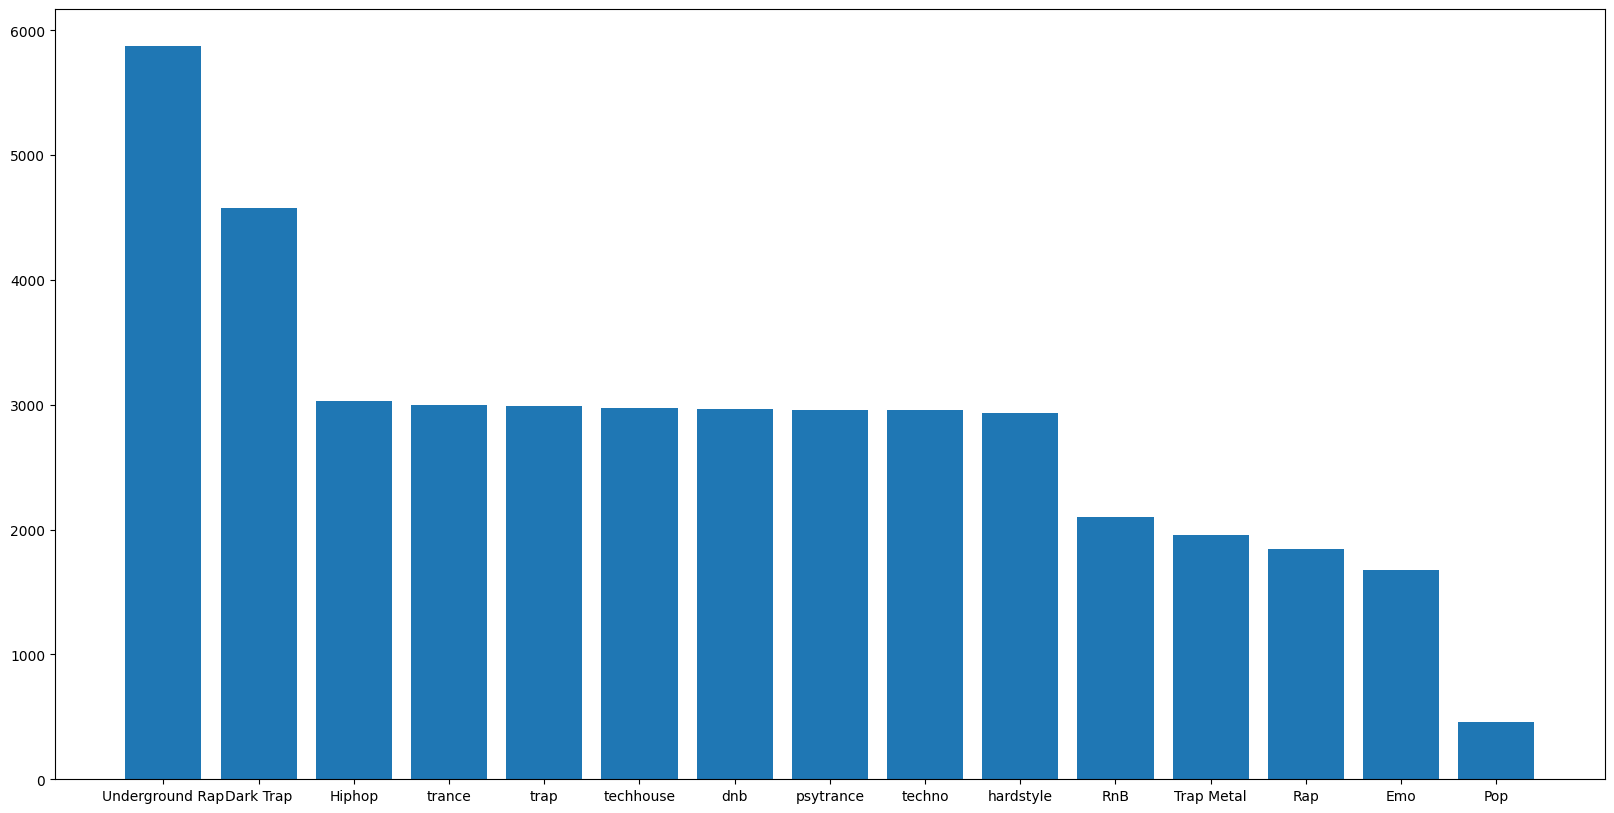

In [ ]:
fig = plt.figure(figsize = (20,10))
plt.bar(height=data['genre'].value_counts().values,x=data['genre'].value_counts().index)
plt.show()

Correlation Analysis

In [ ]:
#packages for correlation analysis
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from imblearn.over_sampling import SMOTE

<Axes: >

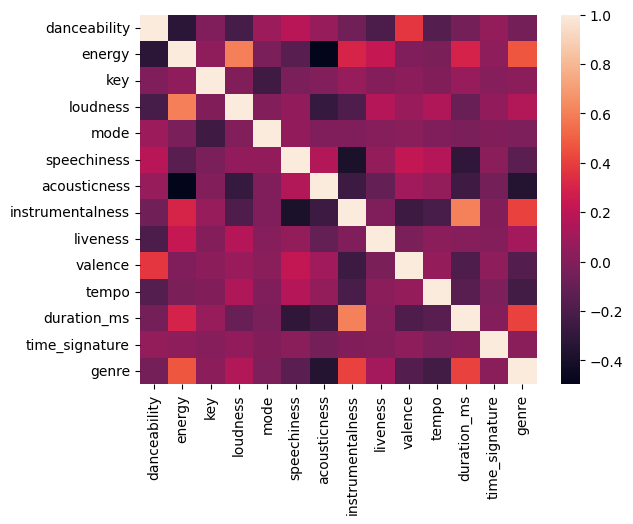

In [ ]:
data['genre'] = LabelEncoder().fit_transform(data['genre'])
corr = data.corr()
sns.heatmap(data=corr)

In [ ]:
#Finally selecting the most important features based on the correlation
features = data.drop(['key','mode','time_signature','danceability','genre'],axis=1)
features

,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.814,-7.364,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,124539
1,0.493,-7.230,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,224427
2,0.893,-4.783,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,98821
3,0.781,-4.710,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,123661
4,0.624,-7.668,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,123298
...,...,...,...,...,...,...,...,...,...
42300,0.693,-5.148,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,269208
42301,0.768,-7.922,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,210112
42302,0.821,-3.102,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,234823
42303,0.921,-4.777,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,323200


In [ ]:
#Performing feature scaling to normalize the values and saving the transform and separate independent and dependent variables.
labels = data['genre']
sc = StandardScaler()
features = sc.fit_transform(features)
joblib.dump(sc,"transform.save")
oversample = SMOTE()
features, labels = oversample.fit_resample(features, labels)
xtrain,xtest,ytrain,ytest = train_test_split(features,labels,test_size=0.2,shuffle = True)

In [ ]:
features.shape

(88125, 9)

In [ ]:
data['genre'].iloc[36654]

8

In [ ]:
xtrain.shape

(70500, 9)

# Building Bagging Classifier

Classification Model

In [ ]:
#packages for modle and bagging classifier to build the model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

In [ ]:
model = BaggingClassifier()

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
n_scores = cross_val_score(model,xtrain,ytrain,scoring='accuracy',cv=cv, n_jobs=-1, error_score='raise')

In [ ]:
n_scores

array([0.76297872, 0.76312057, 0.75333333, 0.75574468, 0.75304965,
       0.75574468, 0.75985816, 0.75531915, 0.74907801, 0.76184397,
       0.74765957, 0.75730496, 0.75815603, 0.75560284, 0.75730496,
       0.75489362, 0.75687943, 0.76099291, 0.75460993, 0.76255319,
       0.75716312, 0.74851064, 0.75914894, 0.75276596, 0.76241135,
       0.76496454, 0.75375887, 0.7551773 , 0.76666667, 0.75602837])

In [ ]:
n_scores.mean()

0.7570874704491726

In [ ]:
model = BaggingClassifier()
model.fit(xtrain,ytrain)
pred = model.predict(xtest)
pred

array([ 4,  8,  3, ...,  1, 11, 11])

Evaluating The Model And Saving The Model

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

In [ ]:
accuracy_score(ytest,pred)*100

76.55602836879433

In [ ]:
f1_score(ytest,pred,average='weighted')

0.7615022253956772

In [ ]:
joblib.dump(model,"bagging.model")

['bagging.model']